## K-Nearest Neighbors Algorithm

K-Nearest Neighbors (KNN) is a straightforward and intuitive machine learning algorithm used for both classification and regression tasks. At its core, KNN relies on the principle that similar data points tend to be close to each other in the feature space.

#### What is KNN?
KNN is a supervised learning algorithm that makes predictions based on the majority class or average value of its "K" nearest data points in the training dataset.It is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution.

How does it work?

1. Data Points and Features: 
KNN operates on a dataset consisting of data points, each with multiple features or attributes. These data points can be thought of as points in a multidimensional space, where each feature represents a dimension.

2. Choosing K: 
The first step is to choose the value of "K," which represents the number of nearest neighbors to consider when making predictions. Typically, "K" is an odd number to avoid ties when classifying data points.

3. Distance Calculation: 
KNN relies on distance metrics to measure the similarity or dissimilarity between data points.Common distance metrics include Euclidean distance, Manhattan distance, and cosine similarity.

Euclidean distance, the most commonly used metric, is calculated as follows for two points, p and q, with n features:

Eucledean Distance
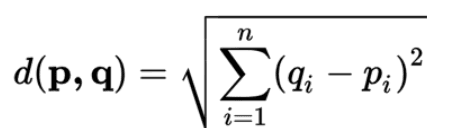


4. Finding the Neighbors: 
For a given data point (the one we want to make a prediction for), KNN calculates the distance between this point and all other points in the training dataset.

5. Selecting K Nearest Neighbors: 
KNN then selects the "K" data points with the smallest distances to the point being predicted. These "K" data points become the nearest neighbors.

#### Classification (for Classification Tasks):

In classification tasks, KNN counts the class labels of the "K" nearest neighbours.

The class label that occurs most frequently among these neighbors is assigned to the new data point.

Example: If out of the "K" neighbors, 5 belong to Class A and 3 belong to Class B, the prediction for the new data point is Class A.

#### Regression (for Regression Tasks):

In regression tasks, KNN calculates the average (or weighted average) of the target values of the "K" nearest neighbors. This average is assigned as the prediction for the new data point.

Example: If the target values of the "K" neighbors are [10, 12, 15, 8, 9], the prediction for the new data point is the average of these values, which is 10.8.

In KNN, "K" represents the number of nearby data points considered when making predictions.

Choosing "K" is crucial:

Smaller "K" (e.g., 1 or 3) leads to a sensitive model, capturing fine details but susceptible to noise and outliers.
Larger "K" (e.g., 10 or 20) results in a smoother, more stable model, but may overlook local variations.
The optimal "K" depends on the dataset and problem; it's often determined through techniques like cross-validation.

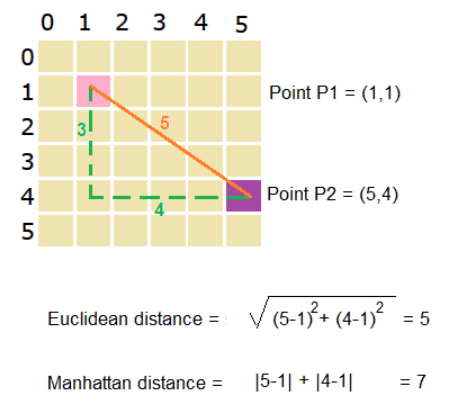

### Pros of KNN Algorithm Python:
- **Simplicity:** KNN is easy to understand and implement, making it an excellent choice for beginners.
- **Versatility:** It can be used for classification and regression tasks and adapts well to various types of data.
- **No training phase:** KNN doesn't require a separate training phase, as it stores the entire dataset for predictions.

### Cons of KNN Algorithm Python:

- **Computational Complexity:** As the dataset grows, the computational cost of KNN increases significantly because it involves calculating distances between data points.
- **Sensitivity to Outliers:** KNN can be sensitive to outliers in the data, leading to suboptimal performance.
- **Curse of Dimensionality:** In high-dimensional spaces, KNN may struggle to find meaningful neighbors due to the "curse of dimensionality."

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (classes)

In [3]:
# Split the dataset into a training set and a testing set (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
from sklearn.metrics import pairwise_distances

# For simplicity, we'll use Euclidean distance as the distance metric
distances = pairwise_distances(X_test, X_train, metric='euclidean')


In [5]:
distances

array([[1.2489996 , 0.53851648, 1.08627805, ..., 3.84447656, 0.78740079,
        1.81383571],
       [2.54754784, 3.78945906, 4.20356991, ..., 0.55677644, 2.74772633,
        4.84561658],
       [4.1       , 2.42487113, 2.03715488, ..., 6.5169011 , 3.6373067 ,
        1.2489996 ],
       ...,
       [1.78325545, 0.64031242, 0.90553851, ..., 3.94461658, 1.28062485,
        1.40356688],
       [2.89482297, 4.20356991, 4.60868745, ..., 0.46904158, 3.12729915,
        5.26782688],
       [2.6795522 , 4.03360881, 4.46318272, ..., 0.58309519, 2.93598365,
        5.13322511]])

In [6]:
import numpy as np

def find_k_nearest_neighbors(distances, k):
    # Find the indices of the K-nearest neighbors for each test sample
    k_nearest_neighbors_indices = np.argsort(distances, axis=1)[:, :k]
    return k_nearest_neighbors_indices

k = 5  # Choose the value of K
k_nearest_neighbors_indices = find_k_nearest_neighbors(distances, k)


In [7]:
from scipy.stats import mode

def predict_majority_class(k_nearest_neighbors_indices, y_train):
    # Get the classes of the K-nearest neighbors
    k_nearest_classes = y_train[k_nearest_neighbors_indices]
    
    # Predict the class based on the majority class among the neighbors
    predictions, _ = mode(k_nearest_classes, axis=1)
    return predictions.ravel()

y_pred = predict_majority_class(k_nearest_neighbors_indices, y_train)


C:\Users\Rakesh_PC\AppData\Local\Temp\ipykernel_9140\2275599872.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  predictions, _ = mode(k_nearest_classes, axis=1)


In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
